In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import visualkeras as vs

import numpy as np
import pandas as pd
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [2]:
data = pd.read_csv("C:/Users/Esrak/Desktop/CSE422 ANN/Rain Prediction/weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y = data.iloc[:,-1].values

In [5]:
y

array(['No', 'No', 'No', ..., 'No', 'No', nan], dtype=object)

In [6]:
y = y.reshape(-1,1) # change the dimension from horizontal to vertical

In [7]:
y

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       [nan]], dtype=object)

# Cleaning missing data

In [8]:
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')

In [9]:
x = imputer.fit_transform(x)
y = imputer.fit_transform(y)

In [10]:
y

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

# Encoding Dataset
Converting string data to numerical values so I can process the data

In [11]:
col_obj = data.select_dtypes(include = 'object').columns

In [12]:
le1 = LabelEncoder()
x[:,0] = le1.fit_transform(x[:,0])
le2 = LabelEncoder()
x[:,4] = le2.fit_transform(x[:,4])
le3 = LabelEncoder()
x[:,6] = le3.fit_transform(x[:,6])
le4 = LabelEncoder()
x[:,7] = le4.fit_transform(x[:,7])
le5 = LabelEncoder()
x[:,8] = le5.fit_transform(x[:,8])
le6 = LabelEncoder()
x[:,9] = le6.fit_transform(x[:,9])
le7 = LabelEncoder()
x[:,-1] = le7.fit_transform(x[:,-1])

In [13]:
le8 = LabelEncoder()
y[:,-1] = le8.fit_transform(y[:,-1])

In [14]:
x[:, 8]

array([13, 6, 13, ..., 9, 10, 2], dtype=object)

In [15]:
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Feature Scaling

In [16]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [17]:
print(x)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


# Splitting Data to Train and Test Sets

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 42)

In [19]:
x_train

array([[-7.58577434e-01,  1.57348463e+00,  1.55144865e+00, ...,
         1.35043982e+00,  1.71529014e+00, -5.29795450e-01],
       [-1.18026220e+00,  7.41049105e-01,  1.15677045e+00, ...,
         1.19538180e+00,  1.13177755e+00, -5.29795450e-01],
       [ 1.45112977e-02, -5.31163679e-01, -3.23272767e-01, ...,
         1.43502756e-03, -2.39477042e-01,  1.88752093e+00],
       ...,
       [ 2.95634473e-01, -7.19639647e-01, -2.10507569e-01, ...,
        -5.10256445e-01, -6.44232642e-02, -5.29795450e-01],
       [-6.18015846e-01, -5.31163679e-01, -1.18310740e+00, ...,
        -4.48233236e-01, -1.17309719e+00, -5.29795450e-01],
       [ 5.06476854e-01,  5.68279468e-01,  2.45357023e+00, ...,
         2.03269511e+00,  1.78822922e+00, -5.29795450e-01]])

In [20]:
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

# Training Models

In [21]:
#Early stopping
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(x_train, y_train, batch_size = 26, epochs = 5, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/5
3133/3133 [==============================] - 3s 913us/step - loss: 0.4709 - accuracy: 0.7844 - val_loss: 0.3991 - val_accuracy: 0.7810
Epoch 2/5
3133/3133 [==============================] - 3s 890us/step - loss: 0.4184 - accuracy: 0.8065 - val_loss: 0.3897 - val_accuracy: 0.8405
Epoch 3/5
3133/3133 [==============================] - 3s 908us/step - loss: 0.4107 - accuracy: 0.8112 - val_loss: 0.3827 - val_accuracy: 0.8428
Epoch 4/5
3133/3133 [==============================] - 3s 909us/step - loss: 0.4058 - accuracy: 0.8126 - val_loss: 0.3788 - val_accuracy: 0.8441
Epoch 5/5
3133/3133 [==============================] - 3s 904us/step - loss: 0.4062 - accuracy: 0.8112 - val_loss: 0.3770 - val_accuracy: 0.8438


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 9

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

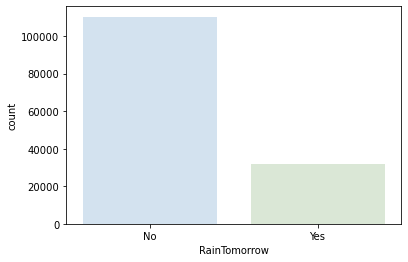

In [23]:
cols= ["#cfe2f3","#d9ead3"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

In [24]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [25]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [26]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [27]:
features = data.drop(columns=['Pressure9am', 'Pressure3pm'])

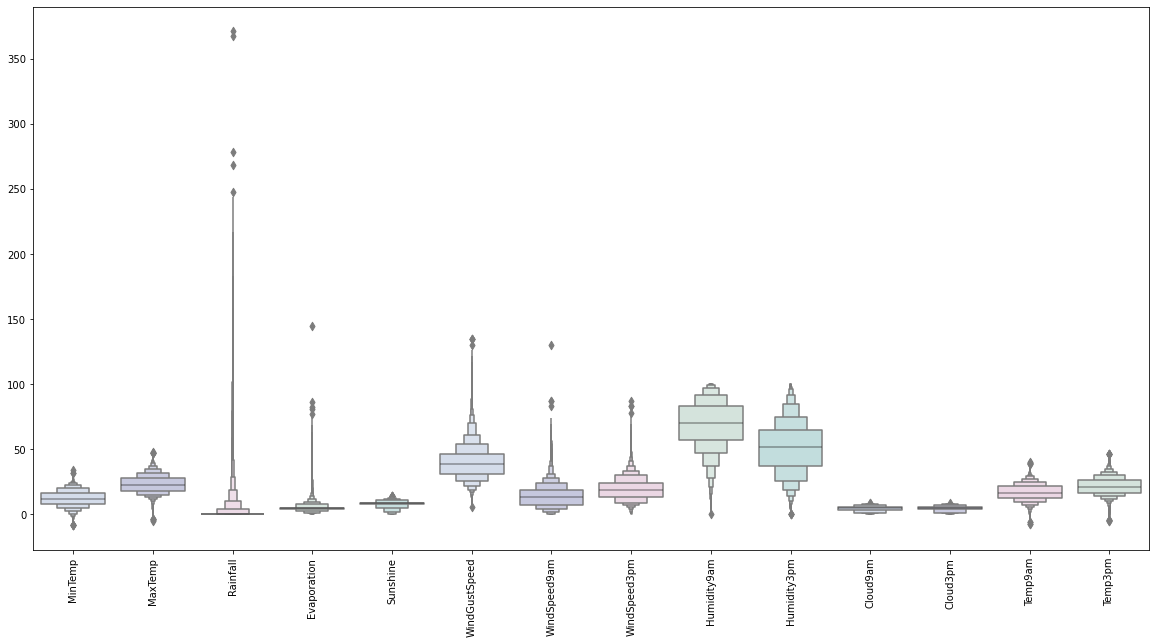

In [28]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [29]:
x = input("Please enter the city:")
new = data[data["Location"] == x]

Please enter the city:Albury


In [31]:
y_predicted = model.predict(x_test)

1364/1364 [==============================] - 1s 492us/step


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
y_test.shape

(43638, 1)